In [1]:
import ROOT
import particle as pt
import numpy as np

filett = ROOT.TFile("./datas/TTDilep.root","OPEN")
tttr = filett.trees.events

file = ROOT.TFile("./datas/Data.root","OPEN")
tr = file.trees.events

Welcome to JupyROOT 6.26/04


In [ ]:
tttr.Print()

In [ ]:
c_a = ROOT.TCanvas()
c_a.Draw()
tttr.Draw("muontracks_chi2>>ha(50,0,2)")

c_b = ROOT.TCanvas()
c_b.Draw()
tttr.Draw("muontracks_minDR>>hb(100,0,4)") #nope

c_c = ROOT.TCanvas()
c_c.Draw()
tttr.Draw("muontracks_dB>>hc(100,0.1,3)")

c_d = ROOT.TCanvas()
c_d.Draw()
tttr.Draw("muontracks_dz>>hd(100,0.1,20)")

c_e = ROOT.TCanvas()
c_e.Draw()
tttr.Draw("muontracks_isoDeposits>>h2(100,0.1,150)")

Warning in <TFile::Append>: Replacing existing TH1: Mu_mass (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Jets_mass (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Reconstruction_mass (Potential memory leak).


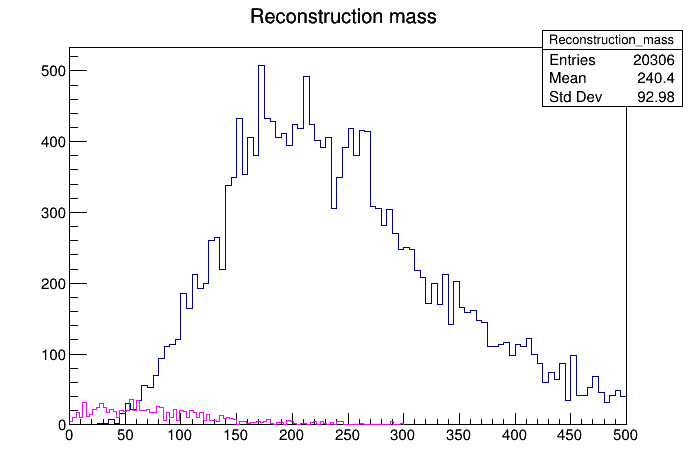

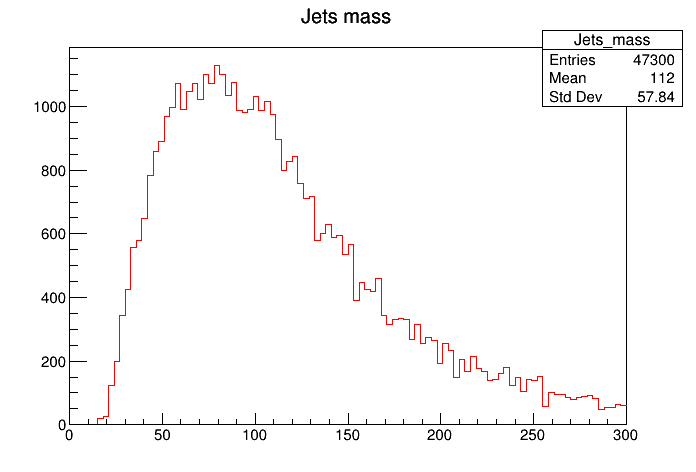

In [4]:
h_mu = ROOT.TH1F("Mu_mass", "Muons mass", 100 , 0 , 300)
h_jet = ROOT.TH1F("Jets_mass", "Jets mass", 100 , 0 , 300)
h_rec = ROOT.TH1F("Reconstruction_mass", "Reconstruction mass", 100 , 0 , 500)

for i in range(tttr.GetEntries()):
    tttr.GetEntry(i)
    if(tttr.muontracks_size>=2):
        p4_mu = []
        p4_jet = []
        muons = pt.get_collection(tttr, "muontracks")
        
        for mi in range(len(muons)):
            if(tttr.muontracks_dz[mi]<0.005 and tttr.muontracks_dB[mi]<0.003 and tttr.muontracks_isoDeposits[mi]<4):
                p4t=muons[mi].p4
                for mj in range(len(muons)):
                    if(mi != mj):
                        if(tttr.muontracks_dz[mj]<0.014 and tttr.muontracks_dB[mj]<0.007 and tttr.muontracks_isoDeposits[mj]<9):
                            p4pp = muons[mj].p4
                            p4_mu.append(p4t+p4pp)
                            
                            s_mu = (p4t+p4pp).M() #per histo solo con mu
                            h_mu.Fill(s_mu) #per histo solo con mu
                            
        jets = pt.get_collection(tttr, "jets")
        for ji in range(len(jets)):
            p4ji = jets[ji].p4
            for jj in range(len(jets)):
                if(ji != jj):
                    p4jj = jets[jj].p4
                    p4_jet.append(p4ji + p4jj)
                    
                    s_j = (p4ji + p4jj).M() #histo solo jets
                    h_jet.Fill(s_j)
                    
        for k in range(len(p4_mu)):
            for l in range(len(p4_jet)):
                s_tot = (p4_mu[k]+p4_jet[l]).M()
                h_rec.Fill(s_tot)
c = ROOT.TCanvas()
c.Draw()
h_rec.Draw()
h_mu.SetLineColor(6)
h_mu.Draw("SAME")

c1=ROOT.TCanvas()
c1.Draw()
h_jet.SetLineColor(2)
h_jet.Draw()          

In [ ]:
len(p4_jet)

In [ ]:
len(p4_mu)